In [72]:
import pandas as pd
from apyori import apriori
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dtale

In [2]:
file = pd.read_csv(r"F:\Dataset\market basket analysis\Groceries data.csv")

In [3]:
file

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


# Data Preprocessing 

In [4]:
file.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [5]:
done = file


In [6]:
done

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [7]:
done1 = done.reset_index()
data = done1.drop(['index'], axis=1)

In [8]:
data['itemDescription'] = data['itemDescription'].str.upper()
data

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,TROPICAL FRUIT,2015,7,21,1
1,2552,2015-05-01,WHOLE MILK,2015,5,1,4
2,2300,2015-09-19,PIP FRUIT,2015,9,19,5
3,1187,2015-12-12,OTHER VEGETABLES,2015,12,12,5
4,3037,2015-01-02,WHOLE MILK,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,SLICED CHEESE,2014,8,10,6
38761,2022,2014-02-23,CANDY,2014,2,23,6
38762,1097,2014-04-16,CAKE BAR,2014,4,16,2
38763,1510,2014-03-12,FRUIT/VEGETABLE JUICE,2014,3,12,2


# Date column 

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [11]:
data

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,TROPICAL FRUIT,2015,7,21,1
1,2552,2015-05-01,WHOLE MILK,2015,5,1,4
2,2300,2015-09-19,PIP FRUIT,2015,9,19,5
3,1187,2015-12-12,OTHER VEGETABLES,2015,12,12,5
4,3037,2015-01-02,WHOLE MILK,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,SLICED CHEESE,2014,8,10,6
38761,2022,2014-02-23,CANDY,2014,2,23,6
38762,1097,2014-04-16,CAKE BAR,2014,4,16,2
38763,1510,2014-03-12,FRUIT/VEGETABLE JUICE,2014,3,12,2


# WeatherWise Speration

In [12]:
cold = data[(data['month'] == 12) | (data['month'] >= 1) & (data['month'] <= 4) | (data['month'] == 11)]



In [13]:
hot = data[(data['month'] >= 5) & (data['month'] <= 10)]

In [14]:
cold['month'].unique()

array([12,  1,  2,  3,  4, 11], dtype=int64)

# hot_basket

In [15]:
basket_cold = pd.crosstab(index=[cold['Member_number']], columns=cold['itemDescription'])
basket_hot = pd.crosstab(index=[hot['Member_number']], columns=hot['itemDescription'])

In [16]:
basket_hot

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,BOTTLED WATER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# cold and hot 

In [17]:
def convert1(data):
    data[data > 0] = 1
    data[data == 0] = 0

In [18]:
basket1 = pd.DataFrame(basket_cold)
array = np.array(basket1)
columns=basket1.columns
index = basket1.index
convert1(array)
cold = pd.DataFrame(array, columns=columns, index=index)

In [19]:
basket2 = pd.DataFrame(basket_hot)
array1 = np.array(basket2)
columns1=basket2.columns
index1 = basket2.index
convert1(array1)
hot = pd.DataFrame(array1, columns=columns1, index=index1)

In [20]:
Basket1 = cold.drop(['TURKEY','PET CARE','PHOTO/FILM'], axis=1)
Basket2 = hot.drop(['TURKEY','PET CARE','PHOTO/FILM'], axis=1)

In [21]:
Basket1

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAGS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
Basket2

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,BOTTLED WATER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# model

# COLD 

In [23]:
import collections

In [24]:
frequent_itemsets1 = apriori(Basket1, min_support=0.003, use_colnames=True)

rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)

C:\Users\ravin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [25]:
rules1.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROLLS/BUNS),(BAKING POWDER),0.211646,0.015075,0.003547,0.016760,1.111732,0.000356,1.001713,0.127484
1,(BAKING POWDER),(ROLLS/BUNS),0.015075,0.211646,0.003547,0.235294,1.111732,0.000356,1.030924,0.102041
2,(ROOT VEGETABLES),(BAKING POWDER),0.139226,0.015075,0.003843,0.027601,1.830856,0.001744,1.012881,0.527208


# HOT 

In [26]:
frequent_itemsets2 = apriori(Basket2, min_support=0.003, use_colnames=True)

rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

C:\Users\ravin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [27]:
rules2.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BOTTLED WATER),(BAKING POWDER),0.129081,0.020964,0.005091,0.039443,1.881439,0.002385,1.019238,0.537928
1,(BAKING POWDER),(BOTTLED WATER),0.020964,0.129081,0.005091,0.242857,1.881439,0.002385,1.150271,0.478524
2,(BAKING POWDER),(CANNED BEER),0.020964,0.112908,0.004193,0.200000,1.771353,0.001826,1.108865,0.444784


# Max items Sold

In [28]:
count = collections.Counter(data['itemDescription'])

In [29]:
items = pd.DataFrame(count.items())

In [30]:
items = items.rename(columns={0:'items', 1:'count'})

In [31]:
items = items.sort_values(by='count', ascending=False)

In [32]:
items

,items,count
1,WHOLE MILK,2502
3,OTHER VEGETABLES,1898
4,ROLLS/BUNS,1716
37,SODA,1514
17,YOGURT,1334
...,...,...
148,RUBBING ALCOHOL,5
119,BAGS,4
111,BABY COSMETICS,3
156,KITCHEN UTENSIL,1


In [68]:
itemss = items[0:6]

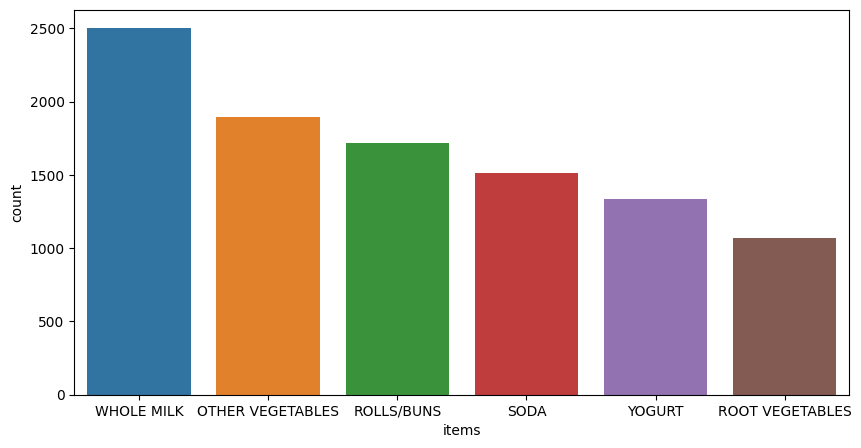

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(data=itemss, x='items', y='count')
plt.show()

# COLD weather recommendations 

In [33]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROLLS/BUNS),(BAKING POWDER),0.211646,0.015075,0.003547,0.016760,1.111732,0.000356,1.001713,0.127484
1,(BAKING POWDER),(ROLLS/BUNS),0.015075,0.211646,0.003547,0.235294,1.111732,0.000356,1.030924,0.102041
2,(ROOT VEGETABLES),(BAKING POWDER),0.139226,0.015075,0.003843,0.027601,1.830856,0.001744,1.012881,0.527208
3,(BAKING POWDER),(ROOT VEGETABLES),0.015075,0.139226,0.003843,0.254902,1.830856,0.001744,1.155250,0.460754
4,(YOGURT),(BAKING POWDER),0.176175,0.015075,0.003547,0.020134,1.335570,0.000891,1.005163,0.304987
...,...,...,...,...,...,...,...,...,...,...
9075,(OTHER VEGETABLES),"(WHOLE MILK, BOTTLED WATER, SODA, ROLLS/BUNS)",0.238250,0.004434,0.003547,0.014888,3.357816,0.002491,1.010612,0.921808
9076,(SODA),"(WHOLE MILK, OTHER VEGETABLES, BOTTLED WATER, ...",0.197162,0.005912,0.003547,0.017991,3.043178,0.002382,1.012300,0.836279
9077,(WHOLE MILK),"(OTHER VEGETABLES, BOTTLED WATER, SODA, ROLLS/...",0.297960,0.004434,0.003547,0.011905,2.684921,0.002226,1.007561,0.893895
9078,(ROLLS/BUNS),"(WHOLE MILK, OTHER VEGETABLES, BOTTLED WATER, ...",0.211646,0.006503,0.003547,0.016760,2.577197,0.002171,1.010432,0.776278


# Support(cold)

In [34]:
pro = rules1[rules1['support'] > 0.05]
pro1 = pro.drop(['confidence','lift','leverage','conviction','zhangs_metric'], axis=1)
pro1.head()

,antecedents,consequents,antecedent support,consequent support,support
1754,(OTHER VEGETABLES),(ROLLS/BUNS),0.238250,0.211646,0.054685
1755,(ROLLS/BUNS),(OTHER VEGETABLES),0.211646,0.238250,0.054685
1770,(OTHER VEGETABLES),(SODA),0.238250,0.197162,0.056163
1771,(SODA),(OTHER VEGETABLES),0.197162,0.238250,0.056163
1792,(WHOLE MILK),(OTHER VEGETABLES),0.297960,0.238250,0.079515


In [35]:
table = pro1.pivot(index='antecedents', columns='consequents', values='support')

<Axes: ylabel='antecedents'>

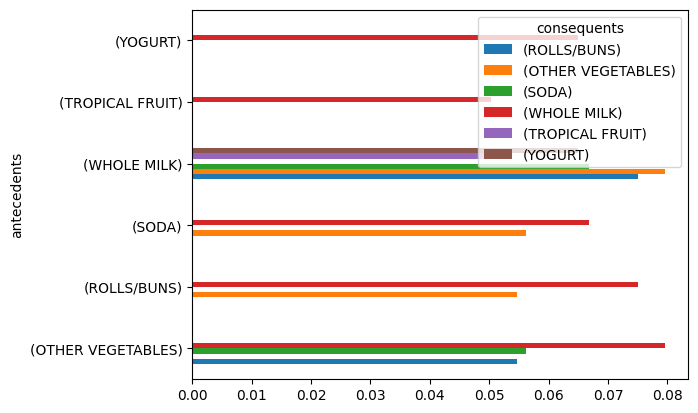

In [36]:
table.plot(kind='barh')

In [37]:
grouped = pro1.groupby(['antecedents', 'consequents'])


for (antecedent, consequent), group_data in grouped:
    print(f"Antecedent: {antecedent}, Consequent: {consequent}")
    print(group_data)
    print("\n")

Antecedent: frozenset({'OTHER VEGETABLES'}), Consequent: frozenset({'ROLLS/BUNS'})
             antecedents   consequents  antecedent support  \
1754  (OTHER VEGETABLES)  (ROLLS/BUNS)             0.23825   

      consequent support   support  
1754            0.211646  0.054685  


Antecedent: frozenset({'OTHER VEGETABLES'}), Consequent: frozenset({'SODA'})
             antecedents consequents  antecedent support  consequent support  \
1770  (OTHER VEGETABLES)      (SODA)             0.23825            0.197162   

       support  
1770  0.056163  


Antecedent: frozenset({'OTHER VEGETABLES'}), Consequent: frozenset({'WHOLE MILK'})
             antecedents   consequents  antecedent support  \
1793  (OTHER VEGETABLES)  (WHOLE MILK)             0.23825   

      consequent support   support  
1793             0.29796  0.079515  


Antecedent: frozenset({'ROLLS/BUNS'}), Consequent: frozenset({'OTHER VEGETABLES'})
       antecedents         consequents  antecedent support  \
1755  (ROLLS/

# Confidence 

In [38]:
con = rules1[rules1['confidence'] > .70]

In [39]:
con1 = con.drop(['antecedent support','consequent support','support','lift','leverage','conviction','zhangs_metric'], axis=1)
con1

,antecedents,consequents,confidence
2610,"(HARD CHEESE, BOTTLED BEER)",(WHOLE MILK),0.777778
5028,"(DOMESTIC EGGS, MEAT)",(WHOLE MILK),0.750000
5412,"(FROZEN MEALS, SHOPPING BAGS)",(WHOLE MILK),0.750000
7863,"(BOTTLED BEER, OTHER VEGETABLES, ROLLS/BUNS)",(WHOLE MILK),0.708333
7891,"(DOMESTIC EGGS, BOTTLED WATER, SODA)",(WHOLE MILK),0.823529
7905,"(PASTRY, OTHER VEGETABLES, BOTTLED WATER)",(WHOLE MILK),0.705882
7961,"(OTHER VEGETABLES, BOTTLED WATER, ROOT VEGETAB...",(WHOLE MILK),0.888889
7989,"(YOGURT, OTHER VEGETABLES, BOTTLED WATER)",(WHOLE MILK),0.809524
8003,"(BOTTLED WATER, ROLLS/BUNS, ROOT VEGETABLES)",(WHOLE MILK),0.800000
8283,"(DOMESTIC EGGS, OTHER VEGETABLES, SODA)",(WHOLE MILK),0.714286


In [40]:
confiden = con1.pivot(index='antecedents', columns='consequents', values='confidence')
confiden

consequents,(WHOLE MILK),(SODA),(OTHER VEGETABLES)
antecedents,,,
"(HARD CHEESE, BOTTLED BEER)",0.777778,NaN,NaN
"(YOGURT, SODA, WHIPPED/SOUR CREAM)",0.785714,NaN,NaN
"(YOGURT, ROLLS/BUNS, ROOT VEGETABLES)",0.736842,NaN,NaN
"(YOGURT, PIP FRUIT, WHIPPED/SOUR CREAM)",0.916667,NaN,NaN
"(YOGURT, PIP FRUIT, SAUSAGE)",0.700000,NaN,NaN
"(YOGURT, ROOT VEGETABLES, PASTRY)",NaN,0.75,NaN
"(PASTRY, SODA, ROOT VEGETABLES)",0.722222,NaN,NaN
"(YOGURT, OTHER VEGETABLES, PASTRY)",0.736842,NaN,NaN
"(OTHER VEGETABLES, BOTTLED WATER, SODA, ROLLS/BUNS)",0.800000,NaN,NaN


<Axes: ylabel='antecedents'>

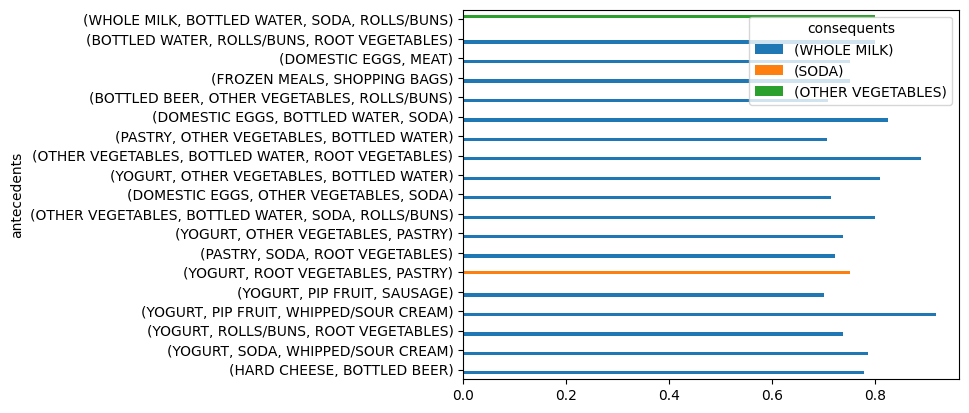

In [41]:
confiden.plot(kind='barh')

# Lift 

In [42]:
lift = rules1[rules1['lift'] > 1]

In [43]:
lift1 = lift.drop(['antecedent support','consequent support','support','confidence','leverage','conviction','zhangs_metric'], axis=1)

In [44]:
pivot_lift = lift1.pivot(index='antecedents', columns='consequents', values='lift')

In [45]:
pivot_lift

consequents,(BAKING POWDER),"(NAPKINS, SODA)","(NAPKINS, ROOT VEGETABLES)","(NAPKINS, SAUSAGE)","(WHIPPED/SOUR CREAM, NAPKINS)","(YOGURT, NAPKINS)","(NEWSPAPERS, ROOT VEGETABLES)","(PASTRY, NEWSPAPERS)","(NEWSPAPERS, PIP FRUIT)","(PORK, NEWSPAPERS)",...,"(WHOLE MILK, FROZEN VEGETABLES)","(BOTTLED WATER, FRUIT/VEGETABLE JUICE)","(HAMBURGER MEAT, BOTTLED WATER)","(YOGURT, MARGARINE)","(NAPKINS, BOTTLED WATER)","(WHOLE MILK, NAPKINS)","(NEWSPAPERS, ROLLS/BUNS)","(NEWSPAPERS, BOTTLED WATER)","(COFFEE, OTHER VEGETABLES)","(WHOLE MILK, OTHER VEGETABLES, SODA, ROLLS/BUNS)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(ROLLS/BUNS),1.111732,1.528631,NaN,NaN,NaN,NaN,NaN,1.754948,NaN,NaN,...,1.282462,NaN,NaN,1.469957,NaN,1.34996,NaN,1.453803,1.574953,NaN
"(NAPKINS, SODA)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(NAPKINS, ROOT VEGETABLES)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(NAPKINS, SAUSAGE)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(WHIPPED/SOUR CREAM, NAPKINS)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(NAPKINS, BOTTLED WATER)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(NEWSPAPERS, BOTTLED WATER)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(NEWSPAPERS, ROLLS/BUNS)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Lift1 = lift.drop(['antecedent support','consequent support','support','confidence','leverage','conviction','zhangs_metric'], axis=1)

In [47]:
Lift1

,antecedents,consequents,lift
0,(ROLLS/BUNS),(BAKING POWDER),1.111732
1,(BAKING POWDER),(ROLLS/BUNS),1.111732
2,(ROOT VEGETABLES),(BAKING POWDER),1.830856
3,(BAKING POWDER),(ROOT VEGETABLES),1.830856
4,(YOGURT),(BAKING POWDER),1.335570
...,...,...,...
9075,(OTHER VEGETABLES),"(WHOLE MILK, BOTTLED WATER, SODA, ROLLS/BUNS)",3.357816
9076,(SODA),"(WHOLE MILK, OTHER VEGETABLES, BOTTLED WATER, ...",3.043178
9077,(WHOLE MILK),"(OTHER VEGETABLES, BOTTLED WATER, SODA, ROLLS/...",2.684921
9078,(ROLLS/BUNS),"(WHOLE MILK, OTHER VEGETABLES, BOTTLED WATER, ...",2.577197


# Hot Whether 

In [48]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BOTTLED WATER),(BAKING POWDER),0.129081,0.020964,0.005091,0.039443,1.881439,0.002385,1.019238,0.537928
1,(BAKING POWDER),(BOTTLED WATER),0.020964,0.129081,0.005091,0.242857,1.881439,0.002385,1.150271,0.478524
2,(BAKING POWDER),(CANNED BEER),0.020964,0.112908,0.004193,0.200000,1.771353,0.001826,1.108865,0.444784
3,(CANNED BEER),(BAKING POWDER),0.112908,0.020964,0.004193,0.037135,1.771353,0.001826,1.016795,0.490885
4,(CITRUS FRUIT),(BAKING POWDER),0.115903,0.020964,0.003594,0.031008,1.479070,0.001164,1.010365,0.366362
...,...,...,...,...,...,...,...,...,...,...
12121,(SODA),"(WHOLE MILK, SAUSAGE, YOGURT, ROLLS/BUNS)",0.195568,0.004792,0.003294,0.016845,3.515410,0.002357,1.012260,0.889494
12122,(WHOLE MILK),"(YOGURT, SAUSAGE, SODA, ROLLS/BUNS)",0.305780,0.003594,0.003294,0.010774,2.997796,0.002195,1.007258,0.959958
12123,(ROLLS/BUNS),"(WHOLE MILK, SAUSAGE, YOGURT, SODA)",0.228811,0.004193,0.003294,0.014398,3.433901,0.002335,1.010354,0.919082
12124,(YOGURT),"(WHOLE MILK, SAUSAGE, SODA, ROLLS/BUNS)",0.178197,0.006589,0.003294,0.018487,2.805882,0.002120,1.012123,0.783163


# Support

In [49]:
supp = rules2[rules2['support'] > .04]

In [50]:
supp1 = supp.drop(['confidence','lift','leverage','conviction','zhangs_metric'], axis=1)

In [51]:
supp1.head()

,antecedents,consequents,antecedent support,consequent support,support
356,(OTHER VEGETABLES),(BOTTLED WATER),0.248577,0.129081,0.040132
357,(BOTTLED WATER),(OTHER VEGETABLES),0.129081,0.248577,0.040132
404,(WHOLE MILK),(BOTTLED WATER),0.305780,0.129081,0.048817
405,(BOTTLED WATER),(WHOLE MILK),0.129081,0.305780,0.048817
996,(WHOLE MILK),(CITRUS FRUIT),0.305780,0.115903,0.042228


In [52]:
tab = supp1.pivot(index='antecedents', columns='consequents', values='support')

Text(0.5, 1.0, 'Horizontal Bar Plot of Support for Antecedents')

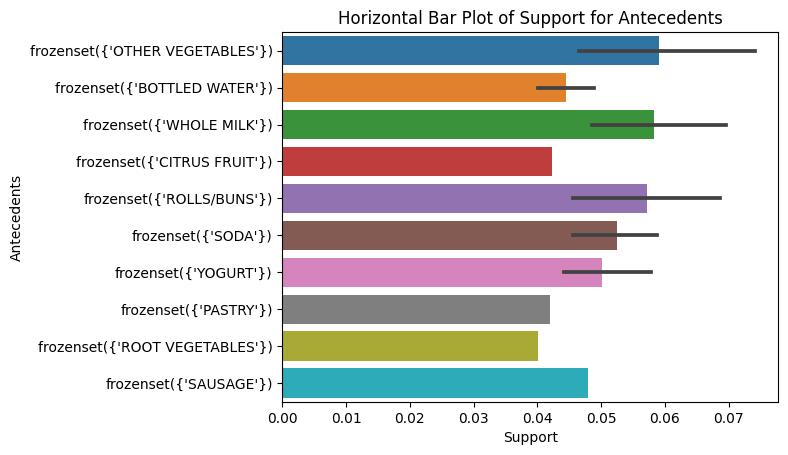

In [53]:
sns.barplot(data=supp1, x='support', y='antecedents')
plt.xlabel('Support')
plt.ylabel('Antecedents')
plt.title('Horizontal Bar Plot of Support for Antecedents')



Text(0.5, 1.0, 'Horizontal Bar Plot of Support for Antecedents')

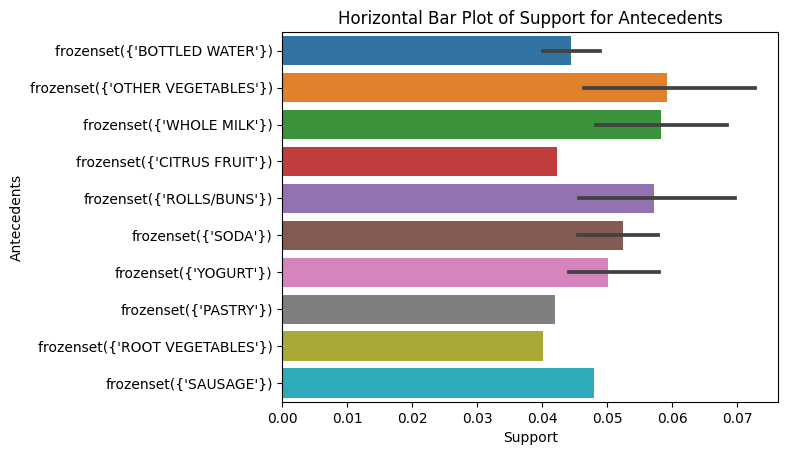

In [54]:
sns.barplot(data=supp1, x='support', y='consequents')
plt.xlabel('Support')
plt.ylabel('Antecedents')
plt.title('Horizontal Bar Plot of Support for Antecedents')


# confidence 

In [55]:
cons = rules2[rules2['confidence'] > .70]
cons1 = cons.drop(['antecedent support','consequent support','support','lift','leverage','conviction','zhangs_metric'], axis=1)

In [56]:
cons1

,antecedents,consequents,confidence
2876,"(BOTTLED BEER, CHOCOLATE)",(WHOLE MILK),0.720000
10447,"(BROWN BREAD, SHOPPING BAGS, ROLLS/BUNS)",(OTHER VEGETABLES),0.733333
10614,"(PORK, YOGURT, CITRUS FRUIT)",(OTHER VEGETABLES),0.750000
11635,"(YOGURT, OTHER VEGETABLES, WHITE BREAD)",(WHOLE MILK),0.800000
11636,"(YOGURT, WHOLE MILK, WHITE BREAD)",(OTHER VEGETABLES),0.857143
12098,"(WHOLE MILK, SAUSAGE, YOGURT, SODA)",(ROLLS/BUNS),0.785714
12099,"(YOGURT, SAUSAGE, SODA, ROLLS/BUNS)",(WHOLE MILK),0.916667


<Axes: ylabel='antecedents'>

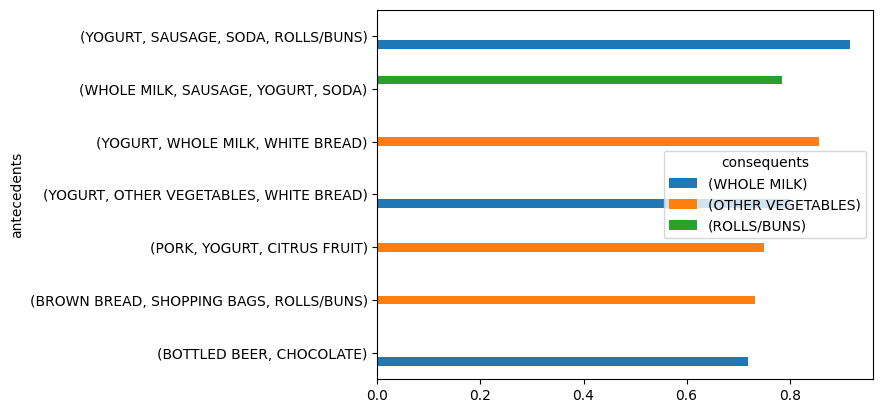

In [57]:
com_table = cons1.pivot(index='antecedents', columns='consequents', values='confidence')
com_table.plot(kind='barh')

In [58]:
list2 = set(cons1['consequents'])
list2

{frozenset({'OTHER VEGETABLES'}),
 frozenset({'ROLLS/BUNS'}),
 frozenset({'WHOLE MILK'})}

In [59]:
list1 = set(cons1['antecedents'])
list1

{frozenset({'CITRUS FRUIT', 'PORK', 'YOGURT'}),
 frozenset({'WHITE BREAD', 'WHOLE MILK', 'YOGURT'}),
 frozenset({'BROWN BREAD', 'ROLLS/BUNS', 'SHOPPING BAGS'}),
 frozenset({'BOTTLED BEER', 'CHOCOLATE'}),
 frozenset({'ROLLS/BUNS', 'SAUSAGE', 'SODA', 'YOGURT'}),
 frozenset({'SAUSAGE', 'SODA', 'WHOLE MILK', 'YOGURT'}),
 frozenset({'OTHER VEGETABLES', 'WHITE BREAD', 'YOGURT'})}

# Lift 

In [60]:
lft = rules2[rules2['lift'] > 1]

In [61]:
lft1 = lft.drop(['antecedent support','consequent support','support','confidence','leverage','conviction','zhangs_metric'], axis=1)

In [62]:
lft1

,antecedents,consequents,lift
0,(BOTTLED WATER),(BAKING POWDER),1.881439
1,(BAKING POWDER),(BOTTLED WATER),1.881439
2,(BAKING POWDER),(CANNED BEER),1.771353
3,(CANNED BEER),(BAKING POWDER),1.771353
4,(CITRUS FRUIT),(BAKING POWDER),1.479070
...,...,...,...
12121,(SODA),"(WHOLE MILK, SAUSAGE, YOGURT, ROLLS/BUNS)",3.515410
12122,(WHOLE MILK),"(YOGURT, SAUSAGE, SODA, ROLLS/BUNS)",2.997796
12123,(ROLLS/BUNS),"(WHOLE MILK, SAUSAGE, YOGURT, SODA)",3.433901
12124,(YOGURT),"(WHOLE MILK, SAUSAGE, SODA, ROLLS/BUNS)",2.805882


<Axes: ylabel='lift'>

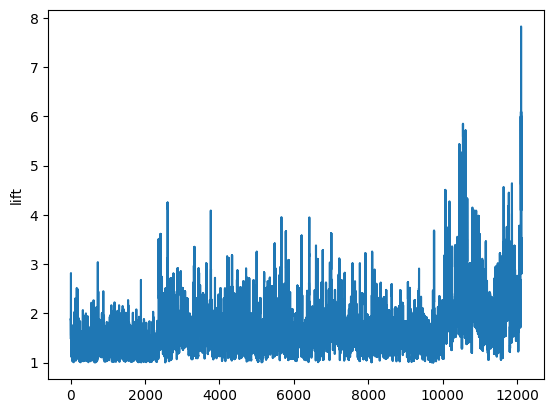

In [63]:
sns.lineplot(lft1['lift'])

# final

# Cold

In [64]:
sorted_rules1 = rules1.sort_values(by=['support','confidence','lift'], ascending=False)

In [65]:
sorted_rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1793,(OTHER VEGETABLES),(WHOLE MILK),0.238250,0.297960,0.079515,0.333747,1.120105,0.008526,1.053713,0.140763
1792,(WHOLE MILK),(OTHER VEGETABLES),0.297960,0.238250,0.079515,0.266865,1.120105,0.008526,1.039031,0.152736
1977,(ROLLS/BUNS),(WHOLE MILK),0.211646,0.297960,0.075081,0.354749,1.190590,0.012019,1.088009,0.203056
1976,(WHOLE MILK),(ROLLS/BUNS),0.297960,0.211646,0.075081,0.251984,1.190590,0.012019,1.053926,0.228022
2117,(SODA),(WHOLE MILK),0.197162,0.297960,0.066805,0.338831,1.137167,0.008058,1.061815,0.150244


# Hot

In [66]:
sorted_rules2 = rules2.sort_values(by=['support','confidence','lift'], ascending=False)

In [67]:
sorted_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1953,(OTHER VEGETABLES),(WHOLE MILK),0.248577,0.305780,0.084756,0.340964,1.115062,0.008746,1.053387,0.137325
1952,(WHOLE MILK),(OTHER VEGETABLES),0.305780,0.248577,0.084756,0.277179,1.115062,0.008746,1.039570,0.148640
2157,(ROLLS/BUNS),(WHOLE MILK),0.228811,0.305780,0.078467,0.342932,1.121498,0.008501,1.056542,0.140479
2156,(WHOLE MILK),(ROLLS/BUNS),0.305780,0.228811,0.078467,0.256611,1.121498,0.008501,1.037397,0.156054
1917,(ROLLS/BUNS),(OTHER VEGETABLES),0.228811,0.248577,0.067385,0.294503,1.184752,0.010508,1.065096,0.202209
